In [98]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [99]:
def plot_simulation(loan_amount, months, interest_rate, extra_payments=0, prepay_penalties=0.01, extra_payment_reduce_term=True, show=False):
    """
    Simulate a fixed-rate mortgage (FRM)
    :param loan_amount: 
        initial loan balance
    :param months: 
        term of mortgage in months
    :param interest_rate: 
        annual percentage of the remaining loan balance
    :param extra_payments:
        optional; monthly extra payments
    :param prepay_penalties:
        optional; in case of montly extra payments (e.g. 0.01 means 1% of the prepaid value)
    :param extra_payment_reduce_term:
        optional; in case of montly extra payments; True: keep the rate fixed, False: reduce the rate
    :param show:
        show plot of cumulative principal and cumulative interest
    :return: 
        pd.DataFrame
        [
            [no. month, loan balance, monthly payment = P + I, principal (P), interest (I), cumulative principal, cumulative interest],
            ...
        ]
    """

    cumulative_interest = 0
    cumulative_principal = 0
    
    data = []
    balance = loan_amount
    
    # Excel.PMT function
    monthly_payment = -numpy.pmt(interest_rate / 12, months, loan_amount)
    
    for i in range(months):
        if balance <= 0:
            break
            
        interest = balance * (interest_rate / 12)
        principal = min(balance, monthly_payment - interest)
        balance -= principal
        
        if balance > 0 and extra_payments:
            extra = min(balance, extra_payments * (1 - prepay_penalties)) # prepay penalties aka. commission / fee
            principal += extra
            balance -= extra
            
            if not extra_payment_reduce_term:
                monthly_payment = -numpy.pmt(interest_rate / 12, months - i, balance)
        
        
        cumulative_principal += principal
        cumulative_interest += interest
        
        data.append([i + 1, balance, monthly_payment, principal, interest, cumulative_principal, cumulative_interest])
        
    df_data = pd.DataFrame(data, columns=[
        "Month", 
        "Remaining Balance", 
        "Montly payment = P + I", 
        "Princiap (P)", 
        "Interest (I)", 
        "Cumulative P",
        "Cumulative I"])
        
    payments = len(df_data)
    years = payments // 12
    
    plt.title(f"{payments} payments ({years}y, {payments - years  *12}m)\n"
              f"* loan amount: {loan_amount:.2f}, yearly interest rate: {interest_rate * 100:0.4f}%\n"
              f"* monthly payment: {monthly_payment + extra_payments:0.2f}\n"
              f"* total interest:  {df_data['Cumulative I'].iloc[-1]:0.2f}\n"
              f"* total principal: {df_data['Cumulative P'].iloc[-1]:0.2f}", loc="left")
    X = list(range(len(df_data)))
    plt.plot(X, df_data["Cumulative I"], label="Cumulative interest", c="g" if extra_payments else "r")
    plt.plot(X, df_data["Cumulative P"], label="Cumulative principal", c="b")
    plt.ylabel("Value")
    plt.xlabel("Month")
    plt.legend()
    
    if show:
        plt.show()
        
    return df_data
    
def plot_full_simulation(loan_amount, months, interest_rate, extra_payments=0, prepay_penalties=0.01, extra_payment_reduce_term=True):
    plt.figure(figsize=(20, 5))
    plt.subplot(131)
    df_data = plot_simulation(loan_amount, months, interest_rate, extra_payments=0)
    data = [df_data]
    if extra_payments > 0:
        plt.subplot(132)
        df_data2 = plot_simulation(loan_amount, months, interest_rate, extra_payments, prepay_penalties, extra_payment_reduce_term)
        data.append(df_data2)
        
        plt.subplot(133)
        plt.bar([0], [loan_amount], label="A. Loan amount")
        plt.bar([1], [df_data["Cumulative I"].iloc[-1]], label="B. Total interest after loan term", color="r")
        plt.bar([2], [df_data_["Cumulative I"].iloc[-1]], label="C. (B) with monthly extra payments", color="green")
        plt.ylabel("Value")
        plt.xticks([0, 1, 2], ["Loan amount", "B. Interest", "C. Interest"])
        plt.legend()
    plt.show()
    
    return data

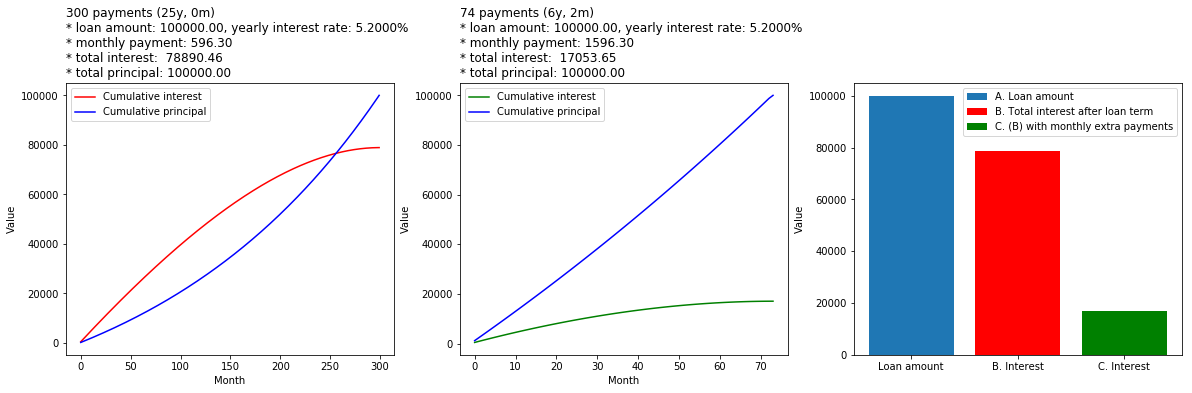

In [100]:
df_data, df_data_ = plot_full_simulation(100000, 25*12, 5.2 / 100, extra_payments=1000, prepay_penalties=0.01, extra_payment_reduce_term=True)

In [102]:
df_data

,Month,Remaining Balance,Montly payment = P + I,Princiap (P),Interest (I),Cumulative P,Cumulative I
0,1,99837.031815,596.301518,162.968185,433.333333,162.968185,433.333333
1,2,99673.357434,596.301518,163.674381,432.627138,326.642566,865.960471
2,3,99508.973798,596.301518,164.383636,431.917882,491.026202,1297.878353
3,4,99343.877833,596.301518,165.095965,431.205553,656.122167,1729.083907
4,5,99178.066451,596.301518,165.811381,430.490137,821.933549,2159.574044
...,...,...,...,...,...,...,...
295,296,2359.588599,596.301518,583.547927,12.753592,97640.411401,78864.838070
296,297,1773.511965,596.301518,586.076635,10.224884,98226.488035,78875.062954
297,298,1184.895665,596.301518,588.616300,7.685219,98815.104335,78882.748172
298,299,593.728694,596.301518,591.166971,5.134548,99406.271306,78887.882720


In [104]:
df_data_

,Month,Remaining Balance,Montly payment = P + I,Princiap (P),Interest (I),Cumulative P,Cumulative I
0,1,98847.031815,596.301518,1152.968185,433.333333,1152.968185,433.333333
1,2,97689.067434,596.301518,1157.964381,428.337138,2310.932566,861.670471
2,3,96526.085208,596.301518,1162.982226,423.319292,3473.914792,1284.989763
3,4,95358.063392,596.301518,1168.021816,418.279703,4641.936608,1703.269466
4,5,94184.980148,596.301518,1173.083244,413.218275,5815.019852,2116.487741
...,...,...,...,...,...,...,...
69,70,5950.102515,596.301518,1553.784674,32.516844,94049.897485,16991.208808
70,71,4389.584774,596.301518,1560.517741,25.783778,95610.415226,17016.992586
71,72,2822.304789,596.301518,1567.279984,19.021534,97177.695211,17036.014120
72,73,1248.233258,596.301518,1574.071531,12.229987,98751.766742,17048.244107
